In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
np.set_printoptions(threshold=np.inf)  # disables truncation

In [2]:
path=r"C:\Users\ladom\Desktop\LLm\data\Churn_Modelling.csv"
df=pd.read_csv(path)

# Drop unnecessary columns
df_processed = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited'].values

# Keep track of numerical and categorical columns
cat_cols = ['Geography', 'Gender']
num_cols = [col for col in df_processed.columns if col not in cat_cols]

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)
df_processed

Numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical columns: ['Geography', 'Gender']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


Label encoding

One Hot encoding "Geography" column

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Create preprocessing steps for both categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ])

# Apply transformations
X = preprocessor.fit_transform(df_processed)
print("Shape after preprocessing:", X)

Shape after preprocessing: [[6.1900000e+02 4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0134888e+05 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [6.0800000e+02 4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00
  0.0000000e+00 1.0000000e+00 1.1254258e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [5.0200000e+02 4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00
  1.0000000e+00 0.0000000e+00 1.1393157e+05 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [6.9900000e+02 3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3826630e+04 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [8.5000000e+02 4.3000000e+01 2.0000000e+00 1.2551082e+05 1.0000000e+00
  1.0000000e+00 1.0000000e+00 7.9084100e+04 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [6.4500000e+02 4.4000000e+01 8.0000000e+00 1.1375578e+05 2.0000000e+00
  1.0000000e+00 0.0000000e+00 1.4975671e+05 0.0000000e+00 1.0000000e+00
  1.0000000e+00]
 [8.220

In [34]:
# Splitting dataset into Training and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, stratify=y,random_state=42)
print(X_train.shape, y_train.shape)

(8000, 11) (8000,)


In [35]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler() 
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train)
print(df.columns)



[[ 1.05856800e+00  1.71508648e+00  6.84722867e-01 -1.22605881e+00
  -9.10256485e-01  6.41041921e-01 -1.03020600e+00  1.04208392e+00
  -5.78312520e-01 -5.77735169e-01  9.07507376e-01]
 [ 9.13626047e-01 -6.59935474e-01 -6.96201804e-01  4.13287690e-01
  -9.10256485e-01  6.41041921e-01 -1.03020600e+00 -6.23556352e-01
   1.72916886e+00 -5.77735169e-01  9.07507376e-01]
 [ 1.07927399e+00 -1.84931084e-01 -1.73189531e+00  6.01687478e-01
   8.08830361e-01  6.41041921e-01  9.70679651e-01  3.08127788e-01
   1.72916886e+00 -5.77735169e-01 -1.10191942e+00]
 [-9.29207307e-01 -1.84931084e-01 -5.73946816e-03 -1.22605881e+00
   8.08830361e-01  6.41041921e-01 -1.03020600e+00 -2.90199140e-01
  -5.78312520e-01 -5.77735169e-01  9.07507376e-01]
 [ 4.27035218e-01  9.55079451e-01  3.39491700e-01  5.48318325e-01
   8.08830361e-01 -1.55996038e+00  9.70679651e-01  1.35042236e-01
   1.72916886e+00 -5.77735169e-01  9.07507376e-01]
 [ 8.53863376e-02 -8.99302061e-02  1.37518520e+00 -1.22605881e+00
   8.08830361e-01  

Part 2 Building the ANN 
Initializing the ANN 
Adding the input layer and hidden layers , also Output layer

In [36]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation="relu"),
    tf.keras.layers.Dense(units=6, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

Part 3- Training the ANN 
Compiling the ANN 
Training the ANN on the Training set

In [37]:
from sklearn.utils import class_weight

# Calculate class weights to handle imbalanced classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Compile the model with appropriate metrics
ann.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Train the model with class weights and callbacks
history = ann.fit(
    X_train, 
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=0.0001
        )
    ]
)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7275 - auc_3: 0.4810 - loss: 0.6139 - precision_3: 0.2196 - recall_3: 0.1298 - val_accuracy: 0.7956 - val_auc_3: 0.5096 - val_loss: 0.5388 - val_precision_3: 0.1818 - val_recall_3: 0.0063 - learning_rate: 0.0010
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7275 - auc_3: 0.4810 - loss: 0.6139 - precision_3: 0.2196 - recall_3: 0.1298 - val_accuracy: 0.7956 - val_auc_3: 0.5096 - val_loss: 0.5388 - val_precision_3: 0.1818 - val_recall_3: 0.0063 - learning_rate: 0.0010
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7970 - auc_3: 0.6252 - loss: 0.4990 - precision_3: 0.6222 - recall_3: 0.0214 - val_accuracy: 0.7956 - val_auc_3: 0.6821 - val_loss: 0.4744 - val_precision_3: 0.3704 - val_recall_3: 0.0312 - learning_rate: 0.0010
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7970 - auc_3: 0.6252 - loss: 0.4990 - precision_3: 0.6222 - recall_3: 0.0214 - val_accuracy: 0.7

Part 4 - Making the predictions and evaluating the model 

In [39]:
test_df = pd.DataFrame([
    {
        'CreditScore': 600,
        'Geography': 'France',
        'Gender': "Male",
        'Age': 40,
        'Tenure': 2,
        'Balance': 60000,
        'NumOfProducts': 2,
        'HasCrCard': 1,
        'IsActiveMember': 1,
        'EstimatedSalary': 50000
    }
])

new_customers = [
    # Young, high credit score, low balance
    [750, 'Germany', 'Male', 25, 1, 0.00, 1, 1, 1, 45000],
    
    # Middle-aged, moderate credit, high balance
    [620, 'France', 'Female', 45, 5, 120000.00, 2, 1, 0, 85000],
    
    # Older, low credit, multiple products
    [510, 'Spain', 'Male', 60, 10, 80000.00, 3, 0, 1, 30000],
    
    # Young, high salary, inactive
    [790, 'France', 'Female', 30, 3, 0.00, 1, 1, 0, 120000],
    
    # Mid-age, moderate everything
    [680, 'Germany', 'Male', 38, 4, 50000.00, 2, 0, 1, 70000]
]

columns = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create DataFrame
new_df = pd.DataFrame(new_customers, columns=columns)

# Apply preprocessing
X_new = preprocessor.transform(new_df)
X_new_scaled = sc.transform(X_new)

# Predict
predictions = ann.predict(X_new_scaled)
print(predictions>0.5)

# Apply the same preprocessing steps


X_test_input = preprocessor.transform(test_df)
X_test_scaled = sc.transform(X_test_input)

# Predict
y_pred = ann.predict(X_test_scaled)
print(y_pred>0.5)
print(np.bincount(y_train))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[False]
 [False]
 [ True]
 [False]
 [False]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[False]
 [False]
 [ True]
 [False]
 [False]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[False]]
[6370 1630]
[[False]]
[6370 1630]


Practising the Test set results

In [80]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred =( ann.predict(X_test) >0.30).astype(int) # Full test set


# Flatten predictions
y_pred_flat = y_pred.flatten()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_flat))
print("Precision:", precision_score(y_test, y_pred_flat))
print("Recall:", recall_score(y_test, y_pred_flat))
print("F1 Score:", f1_score(y_test, y_pred_flat))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_flat))

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
Accuracy: 0.8435
Precision: 0.6044444444444445
Recall: 0.6683046683046683
F1 Score: 0.6347724620770129
Confusion Matrix:
 [[1415  178]
 [ 135  272]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1

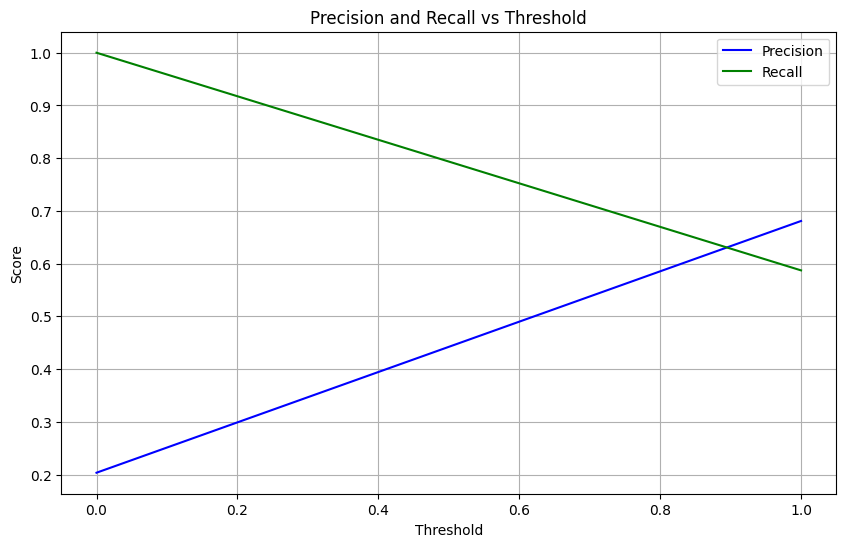

In [64]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_flat)
import matplotlib.pyplot as plt

# Compute precision-recall pairs and thresholds
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_flat)

# Plot precision and recall vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()